In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

In [15]:
digits = datasets.load_digits()

In [16]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

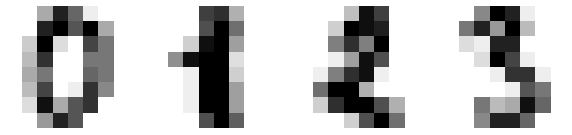

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

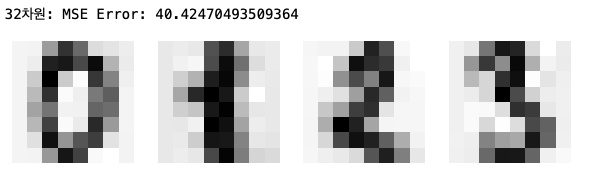

In [18]:
# 예시
Image('assignment_sample.png')

In [19]:
# TODO --> 
def student_components(X, n_components=2):
    pca_results = None
    # TODO -->
    eigen_val, eigen_vec = np.linalg.eig(np.cov(X.T))
    z = []
    for i in range(n_components):
        z.append(eigen_vec[: ,i])
        
    pca_components = np.vstack(z).T
    # <--
    return pca_components

In [38]:
def reconstruct(X, comp):
    n_X = X - X.mean(axis=0)
    eigen_V = student_components(n_X, comp)
    proj = np.dot(n_X, eigen_V)
    recon = np.dot(proj, eigen_V.T)
    recon = recon + X.mean(axis=0)
    
    n_samples = recon.shape[0]
    images = recon.reshape((n_samples, -1))

    MSE = np.square(np.subtract(X, recon)).mean()
    print("%d차원: MSE Error:"%comp ,end=" ")
    print("%.14f"%MSE)
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image in zip(axes, images):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

64차원: MSE Error: 0.00000000000000


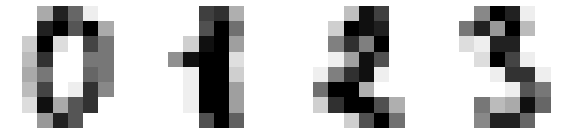

In [39]:
reconstruct(X, 64)